In [24]:
import pandas as pd
import geopandas as gpd
import numpy as np
import rasterio as rs
from rasterio.merge import merge
from rasterio.mask import mask
from rasterio.features import geometry_mask
from shapely.geometry import Point
from datetime import datetime
from sklearn.utils import resample
import sys
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('../../src/')
from evaluation import validation as val
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Prepare Stratified Sample

Details  
- type: pixel-based analysis
- design: stratified sampling approach by class
- total study area (all pixels in the strata): 26 districts
- total samples: when choosing sample count, consider how many points will be dropped from buffer zone and lack of ARD (when creating validation data).

Code: `src/evaluation/validation.py`

In [31]:
mapfile_v27 = '../../tmp/ghana/preds/mosaic/ghana_v27_2024-09-27.tif' 
mapfile_v28 = '../../tmp/ghana/preds/mosaic/ghana_v28_2024-10-15.tif'
final = '../../tmp/ghana/preds/mosaic/final_2024-10-29.tif'
outfile = f'../../data/validation/sampled_points.shp'
buffer = 1000
params_path = '../../params.yaml'

In [46]:
sampled_points = val.run_validation_workflow(mapfile_v27, 
                                             outfile,
                                             buffer,
                                             params_path)

Class distribution: {0: 269113871, 1: 1272342, 2: 138084189, 3: 99051836}
Class proportions: {0: 53.03, 1: 0.25, 2: 27.21, 3: 19.52}
Total count (pixels): 507522238
Creating buffer zone with ['v08', 'v14', 'v15', 'v19', 'v20', 'v21', 'v22'] batches


/Users/jessica.ertel/github/plantation_classifier/notebooks/modeling/../../src/evaluation/validation.py:52: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  df_list.append(df)


Sampling 795 points for class 0 out of 266253457 available pixels.
Sampling 3 points for class 1 out of 1061847 available pixels.
Sampling 408 points for class 2 out of 135383538 available pixels.
Sampling 292 points for class 3 out of 97896824 available pixels.


In [14]:
sampled_points = val.run_validation_workflow(mapfile_v28, 
                                             outfile,
                                             buffer,
                                             params_path)

Class distribution: {0: 269019020, 1: 1360370, 2: 149764864, 3: 87377984}
Class proportions: {0: 53.01, 1: 0.27, 2: 29.51, 3: 17.22}
Total count (pixels): 507522238
Creating buffer zone with ['v08', 'v14', 'v15', 'v19', 'v20', 'v21', 'v22', 'v23'] batches
Total_samples: 1067.0
Sampling 565 points for class 0 out of 266159790 available pixels.
Sampling 2 points for class 1 out of 1145634 available pixels.
Sampling 314 points for class 2 out of 146906463 available pixels.
Sampling 183 points for class 3 out of 86383779 available pixels.


In [3]:
sampled_points = val.run_validation_workflow(final, 
                                             outfile,
                                             buffer,
                                             params_path)

Class distribution: {0: 267810570, 1: 1354277, 2: 151443764, 3: 86913627}
Class proportions: {0: 52.77, 1: 0.27, 2: 29.84, 3: 17.13}
Total count (pixels): 507522238
Creating buffer zone with ['v08', 'v14', 'v15', 'v19', 'v20', 'v21', 'v22', 'v23'] batches
Total_samples: 1067.0
Sampling 563 points for class 0 out of 264952720 available pixels.
Sampling 2 points for class 1 out of 1139546 available pixels.
Sampling 318 points for class 2 out of 148586138 available pixels.
Sampling 182 points for class 3 out of 85917262 available pixels.


# Identify non-consensus labels

In [17]:
john = pd.read_csv('../../data/validation/ceo-plantations-validation-john-sample-data-2024-11-06.csv')
jess = pd.read_csv('../../data/validation/ceo-plantations-validation-jessica-sample-data-2024-11-06.csv')
john = john.iloc[0:150]
jess = jess.iloc[0:150]

In [28]:
merge = john[['plotid', 'System']].merge(jess[['plotid', 'System']], on='plotid', suffixes=('_john', '_jess'))

non_matching = merge[merge['System_john'] != merge['System_jess']]
total_non_matching = non_matching.shape[0]
print("Total count of non-matching rows:", total_non_matching)

Total count of non-matching rows: 67


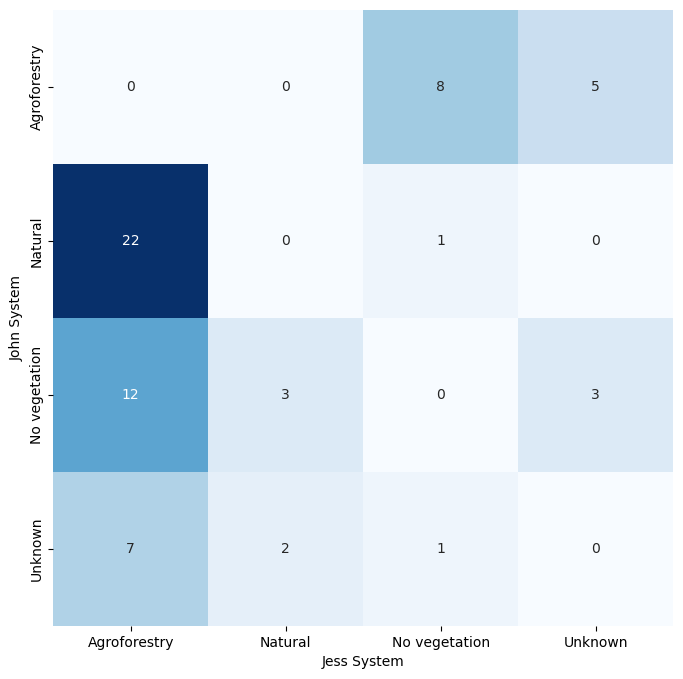

In [27]:
conf_matrix = pd.crosstab(non_matching['System_john'], non_matching['System_jess'], rownames=['John System'], colnames=['Jess System'])

plt.figure(figsize=(8,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.show()

# Add monoculture points

In [34]:
buffer_zone = gpd.read_file('../../data/validation/buffer.shp')

In [38]:
# val.sample_raster_by_class('../../tmp/ghana/preds/mosaic/final_2024-10-29.tif', 
#                            45, 
#                            {0: 1.0, 1: 97.0, 2: 1.0, 3: 1.0},
#                            buffer_zone,
#                            outfile = f'../../data/validation/add_mono_points.shp')

# Evaluate Model

(prototyped)

In [ ]:
# Load the model
model_path = os.path.join(RESULTS_FOLDER, "model_SI_LULC.pkl")
model = joblib.load(model_path)

# load the test features
features_test = 

# Predict the test labels
predicted_labels_test = model.predict(features_test)


class_labels = np.unique(labels_test)
class_names = ['no tree', 'monoculture', 'agroforestry', 'natural']
mask = np.in1d(predicted_labels_test, labels_test)  # noqa: NPY201
predictions = predicted_labels_test[mask]
true_labels = labels_test[mask]

# Extract and display metrics
f1_scores = metrics.f1_score(true_labels, predictions, labels=class_labels, average=None)
avg_f1_score = metrics.f1_score(true_labels, predictions, average="weighted")
recall = metrics.recall_score(true_labels, predictions, labels=class_labels, average=None)
precision = metrics.precision_score(true_labels, predictions, labels=class_labels, average=None)
accuracy = metrics.accuracy_score(true_labels, predictions)

print("Classification accuracy {:.1f}%".format(100 * accuracy))
print("Classification F1-score {:.1f}%".format(100 * avg_f1_score))
print()
print("             Class              =  F1  | Recall | Precision")
print("         --------------------------------------------------")
for idx, lulctype in enumerate([class_names[idx] for idx in class_labels]):
    line_data = (lulctype, f1_scores[idx] * 100, recall[idx] * 100, precision[idx] * 100)
    print("         * {0:20s} = {1:2.1f} |  {2:2.1f}  | {3:2.1f}".format(*line_data))

In [ ]:
## Confusion Matrix
# visual inspo: https://github.com/sentinel-hub/eo-learn/blob/master/examples/land-cover-map/SI_LULC_pipeline.ipynb

## Other Exercises

In [2]:
# create a comb mosaic
def mosaic_tif(tifs_to_mosaic, outpath):

    ''''
    Takes in a list of raster files and
    merges them to form a single tif.

    '''
    dir = f'../../tmp/ghana/preds/mosaic/'
    reader_mode = []

    for file in tifs_to_mosaic:
        src = rs.open(dir+file)
        reader_mode.append(src) 
    print(f'Merging {len(reader_mode)} tifs.')

    mosaic, out_transform = merge(reader_mode)
    date = datetime.today().strftime('%Y-%m-%d')
    outpath = f"{dir}{outpath}_{date}.tif"
    out_meta = src.meta.copy()  
    out_meta.update({'driver': "GTiff",
                     'dtype': 'uint8',
                     'height': mosaic.shape[1],
                     'width': mosaic.shape[2],
                     'transform': out_transform,
                     'compress':'lzw',
                     'nodata': 255})

    with rs.open(outpath, "w", **out_meta) as dest:
        dest.write(mosaic)

    # Ensure to close all files
    for src in reader_mode:
        src.close()

    return None

In [3]:
tifs = ['pd_north_FINAL.tif',
        'pd_east_FINAL.tif',
        'pd_west_FINAL.tif',
       ]

mosaic_tif(tifs, 'final')

Merging 3 tifs.


In [ ]:
## legacy code

In [80]:
# confirm the AOI with 3 different methods
# land_use_map.size	
# Very fast, direct access to array size	
# Includes 255 and other invalid values in the count
# Getting the total number of pixels

# np.bincount()
# Efficiently counts only specified valid classes
# Limited by minlength, ignores other valid classes	
# If you know exactly which classes to count

# Conditional sum()	
# Counts all pixels except 255, flexible
# Slower and more memory-intensive for large datasets
# When you want to exclude 255 without specifying valid classes

counts = np.bincount(land_use_map.flatten(), minlength=4) 
classes = [0, 1, 2, 3] 
valid_counts = counts[classes]
total_count = valid_counts.sum()
lulc_count = sum(land_use_map[land_use_map != 255])

print(land_use_map.size)
print(total_count)
print(lulc_count)